데이터 수집 및 전처리

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
file_paths = [
    './data/safety/encoded-소방용수 현황 2023.csv',
    './data/safety/encoded-소방장비(2017년+이후)_20241101100653.csv',
    './data/safety/encoded-소방청_119안전센터 현황_20240630.csv',
    './data/safety/encoded-소방청_시도 소방서 현황_20240630.csv'
]

fire_water_df = pd.read_csv(file_paths[0], encoding='utf-8')
fire_equipment_df = pd.read_csv(file_paths[1], encoding='utf-8')
safety_center_df = pd.read_csv(file_paths[2], encoding='utf-8')
fire_station_df = pd.read_csv(file_paths[3], encoding='utf-8')

# 필터링 적용
safety_center_df = safety_center_df[safety_center_df['시도본부'] == '서울특별시']
fire_station_df = fire_station_df[fire_station_df['본부명'] == '서울소방재난본부']
display()
fire_water_df['frstt_nm']


,fgt_uswtr_repair_no,frstt_nm,ward_nm,fgt_uswtr_se_nm,sido_nm,sigungu_nm,emd_nm,lnbr,pipng_calbr,wtrprsr,sgnlbrd_instl_yn,nearby_buld,nearby_buld_dist,sttus_se_nm,road_nm_addr,road_nm,buld_mnnm,buld_slno
0,110000001,종로소방서,신영119안전센터,소화전,서울특별시,종로구,신영동,105-30,100.0,3.0,NaN,신영동 105-30CU편의점,1.0,양호,서울특별시 종로구 신영동,세검정로6길,104.0,0.0
1,110000002,종로소방서,신영119안전센터,소화전,서울특별시,종로구,신영동,153-1,100.0,2.0,NaN,삼성중앙빌라,5.0,양호,서울특별시 종로구 신영동,자하문로42길,50.0,0.0
2,110000003,종로소방서,신영119안전센터,소화전,서울특별시,종로구,신영동,150-1,100.0,3.0,NaN,신영동 150-1자하주택,5.0,양호,서울특별시 종로구 신영동,세검정로6길,70.0,0.0
3,110000004,중부소방서,회현119안전센터,소화전,서울특별시,중구,정동,1-16,100.0,2.0,NaN,조선일보사,5.0,양호,서울특별시 중구 정동,세종대로21길,33.0,0.0
4,110000005,중부소방서,회현119안전센터,소화전,서울특별시,중구,정동,1-16,100.0,2.0,NaN,조선일보사,NaN,고장(사용불),서울특별시 중구 정동,세종대로21길,33.0,0.0


K-means 군집화 모델을 통해 지역별 안전 인프라 특성을 분석하고 각 지역을 클러스터로 묶기

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

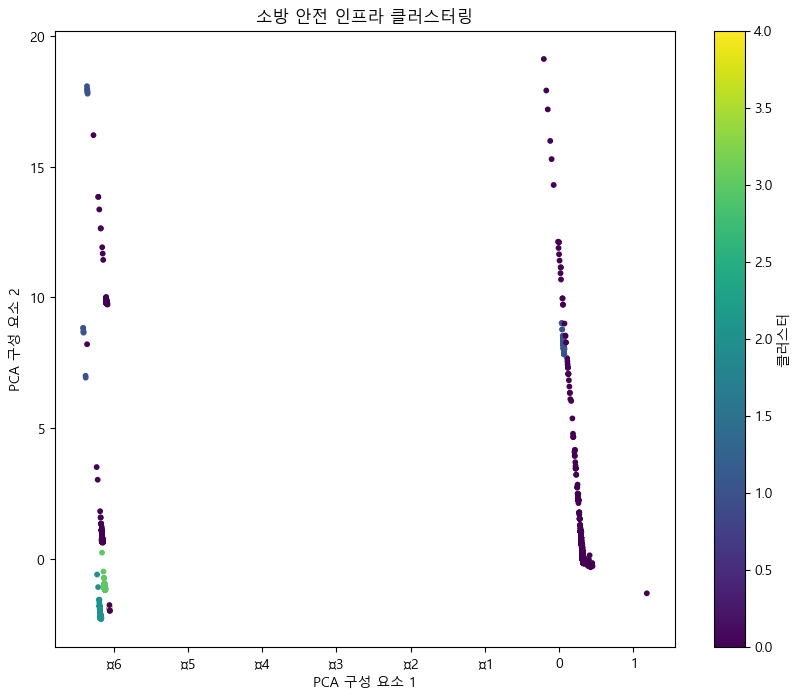

In [ ]:
# 필요한 라이브러리 재불러오기
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  # 숫자 포맷을 위한 모듈

# 데이터 불러오기
file_paths = [
    './data/safety/encoded-소방용수 현황 2023.csv',
    './data/safety/encoded-소방장비(2017년+이후)_20241101100653.csv',
    './data/safety/encoded-소방청_119안전센터 현황_20240630.csv',
    './data/safety/encoded-소방청_시도 소방서 현황_20240630.csv'
]

fire_water_df = pd.read_csv(file_paths[0], encoding='utf-8')
fire_equipment_df = pd.read_csv(file_paths[1], encoding='utf-8')
safety_center_df = pd.read_csv(file_paths[2], encoding='utf-8')
fire_station_df = pd.read_csv(file_paths[3], encoding='utf-8')

# 필터링 조건 적용
safety_center_df = safety_center_df[safety_center_df['시도본부'] == '서울특별시']
fire_station_df = fire_station_df[fire_station_df['본부명'] == '서울소방재난본부']

# 전처리 및 클러스터링
fire_water_df = fire_water_df[['fgt_uswtr_se_nm', 'wtrprsr', 'nearby_buld_dist', 'sttus_se_nm']].dropna()
fire_water_df_encoded = pd.get_dummies(fire_water_df, columns=['fgt_uswtr_se_nm', 'sttus_se_nm'])
scaler = StandardScaler()
fire_water_df_scaled = scaler.fit_transform(fire_water_df_encoded[['wtrprsr', 'nearby_buld_dist'] + 
                                                                    list(fire_water_df_encoded.columns[4:])])

kmeans = KMeans(n_clusters=5, random_state=0)
fire_water_df['cluster'] = kmeans.fit_predict(fire_water_df_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(fire_water_df_scaled)
fire_water_df['pca_1'] = reduced_data[:, 0]
fire_water_df['pca_2'] = reduced_data[:, 1]

# 한글 폰트 설정 및 그래프 그리기
plt.figure(figsize=(10, 8))
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정

# 데이터 플롯
plt.scatter(fire_water_df['pca_1'], fire_water_df['pca_2'], c=fire_water_df['cluster'], cmap='viridis', s=10)
plt.title("소방 안전 인프라 클러스터링")

# X, Y축 레이블 설정 및 숫자 포맷 지정
plt.xlabel("PCA 구성 요소 1")
plt.ylabel("PCA 구성 요소 2")
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))  # X축 숫자 포맷 지정
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))  # Y축 숫자 포맷 지정

# 컬러바 라벨 설정
plt.colorbar(label='클러스터')
plt.show()
